In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [2]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
!mv /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c playground-series-s3e9

  0% 0.00/108k [00:00<?, ?B/s]
100% 108k/108k [00:00<00:00, 28.7MB/s]


## Download data and nessecary functions

In [3]:
zip_ref = zipfile.ZipFile("/content/playground-series-s3e9.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
! wget https://raw.githubusercontent.com/patryklyczko/Machine_Learning_Classes/main/model_data.py
! wget https://raw.githubusercontent.com/patryklyczko/Machine_Learning_Classes/main/regression.py

--2023-03-10 19:18:13--  https://raw.githubusercontent.com/patryklyczko/Machine_Learning_Classes/main/model_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4264 (4.2K) [text/plain]
Saving to: ‘model_data.py’

model_data.py       100%[===================>]   4.16K  --.-KB/s    in 0s      

2023-03-10 19:18:13 (30.3 MB/s) - ‘model_data.py’ saved [4264/4264]

--2023-03-10 19:18:13--  https://raw.githubusercontent.com/patryklyczko/Machine_Learning_Classes/main/regression.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6156 

In [5]:
from model_data import ModelData

In [6]:
from regression import Regression

In [7]:
df = pd.read_csv("/content/train.csv")
df = ModelData(df)
df.head()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


In [8]:
df.describe()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,2703.000000,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,1561.010784,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,1351.500000,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,2703.000000,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,4054.500000,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,5406.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
df.find_null_column()

Index([], dtype='object')

In [10]:
df.columns()

Index(['id', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [11]:
df.null()

id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

In [12]:
df.dtypes()

id                             int64
CementComponent              float64
BlastFurnaceSlag             float64
FlyAshComponent              float64
WaterComponent               float64
SuperplasticizerComponent    float64
CoarseAggregateComponent     float64
FineAggregateComponent       float64
AgeInDays                      int64
Strength                     float64
dtype: object

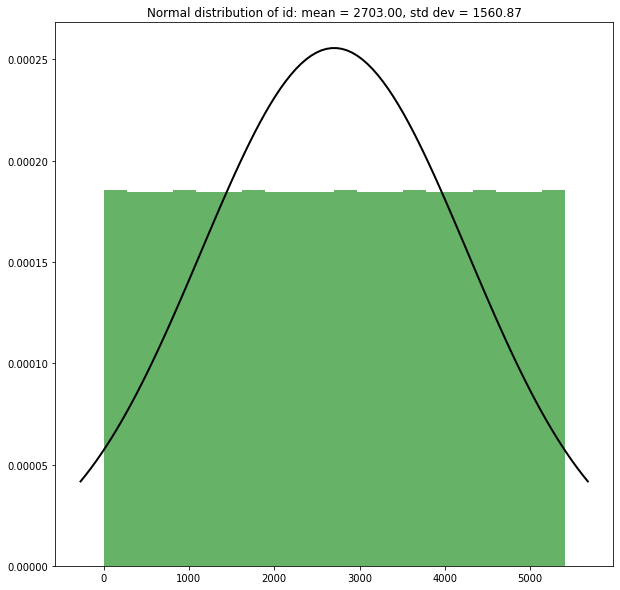

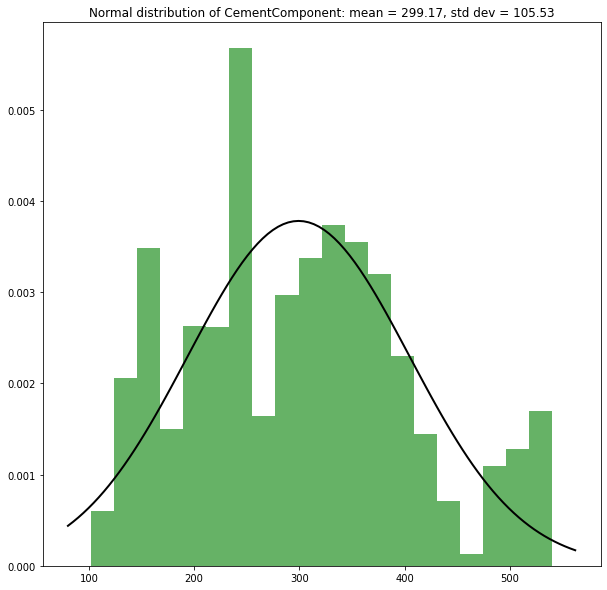

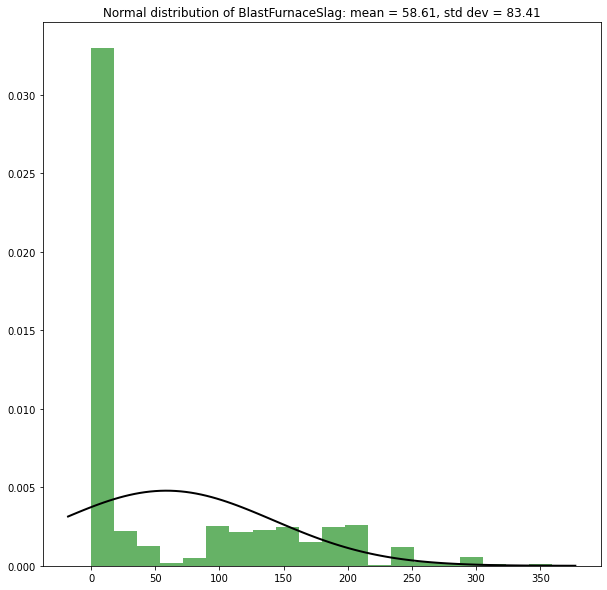

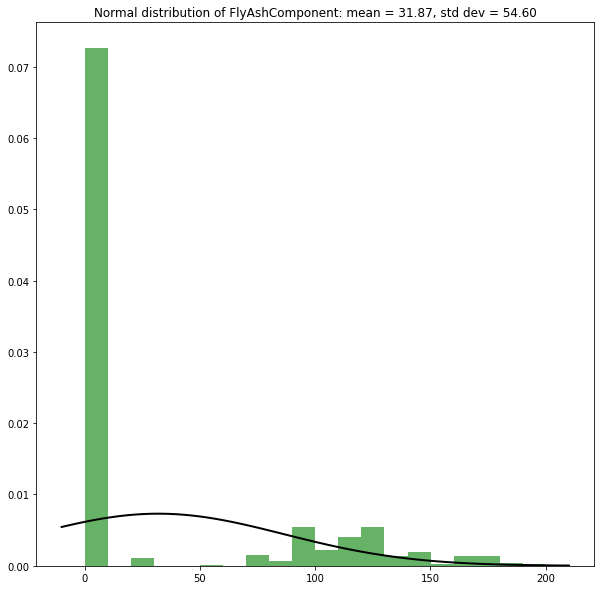

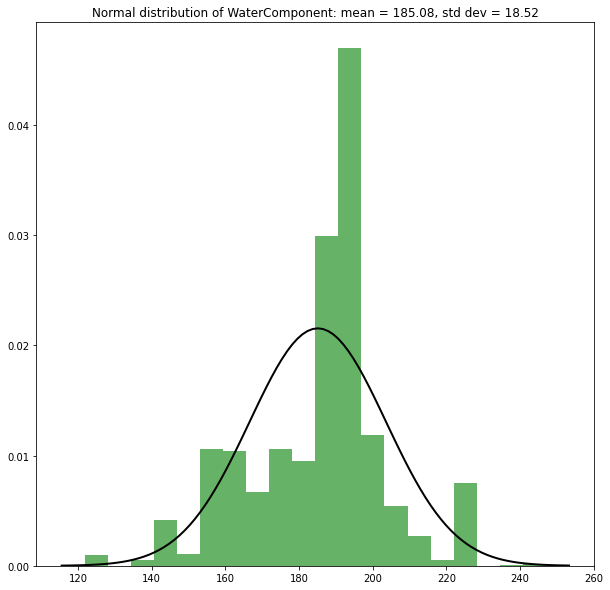

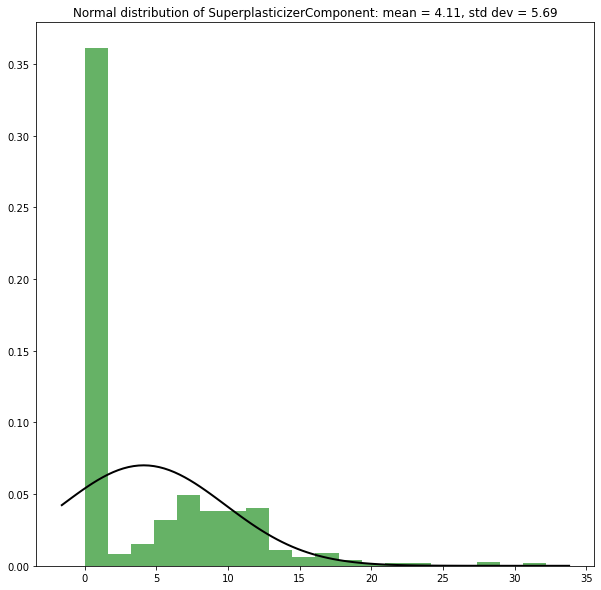

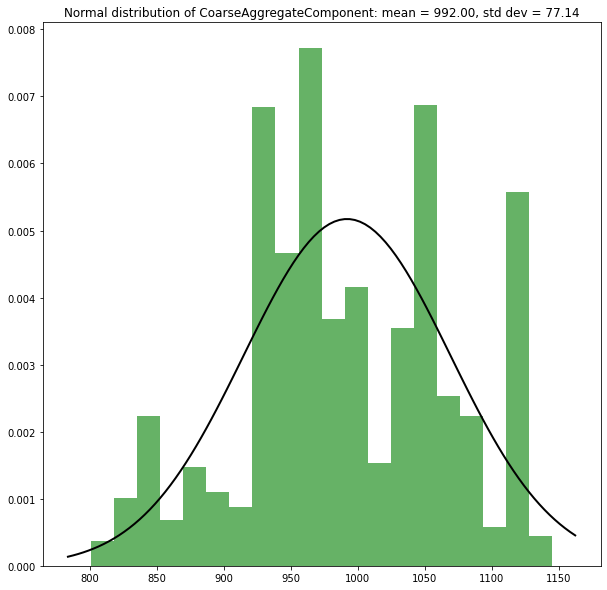

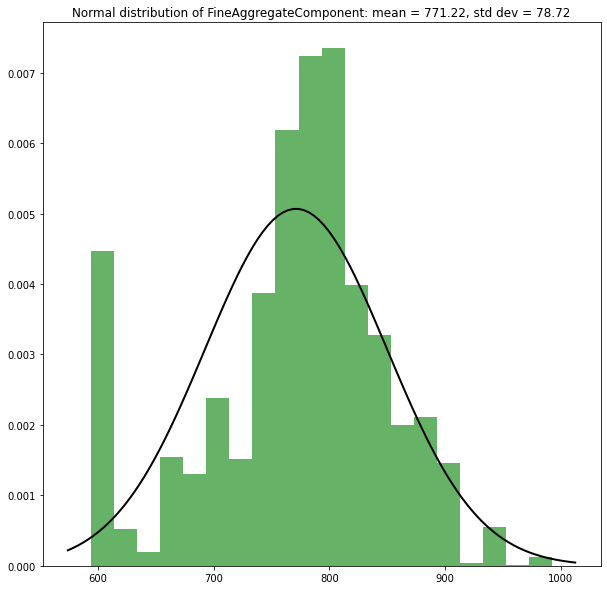

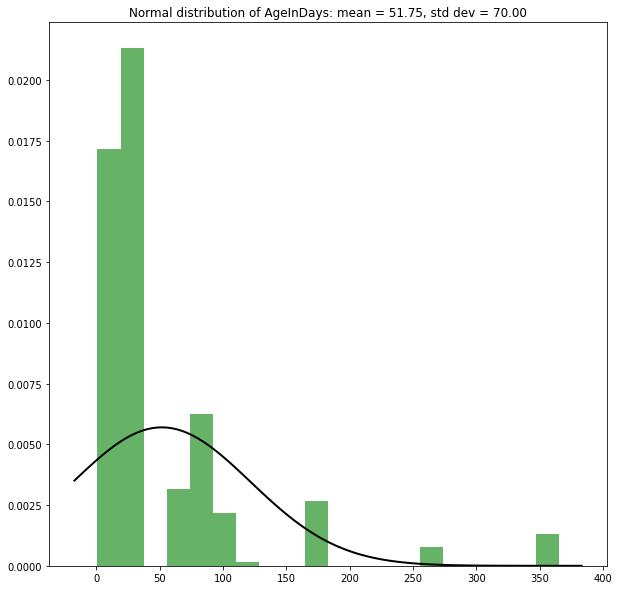

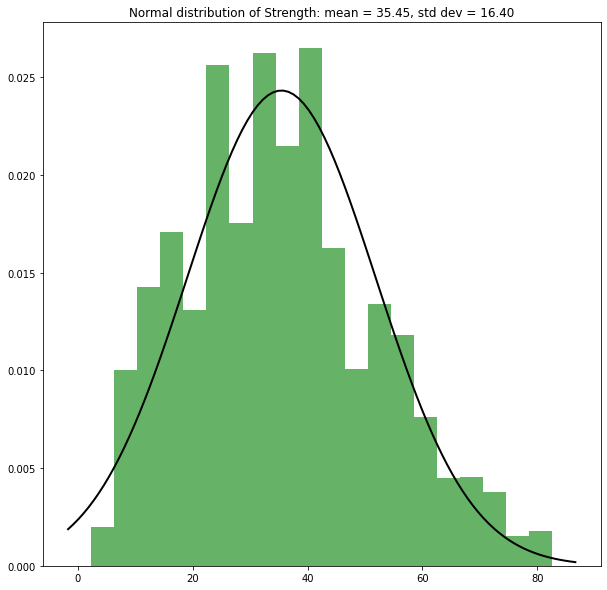

In [13]:
df.normal_distribution(['id', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays','Strength'])

In [14]:
def prepare_data_minmax(df):
  df = ModelData(df)
  df.drop("id")
  df.min_max_scaler(['BlastFurnaceSlag', 'CoarseAggregateComponent','FlyAshComponent','SuperplasticizerComponent','AgeInDays'])
  df.standard_scaler(['CementComponent','WaterComponent', 'FineAggregateComponent'])
  df = df.return_dataframe()
  return df

## Trying models from sklearn

In [15]:
df = pd.read_csv("/content/train.csv")
df = prepare_data_minmax(df)
X = df.drop("Strength", axis=1)
y = df["Strength"]

model = Regression()
model.train_all_models(X,y)

Best hyperparameters: {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'penalty': 'l1'}
SGD_model created
Best hyperparameters: {'alpha': 0.01, 'max_iter': 1000}
Lasso created
Best hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.8, 'max_iter': 1000}
ElasticNet created
Best hyperparameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
SVR created
Best hyperparameters: {'alpha': 1, 'max_iter': 100, 'solver': 'lsqr'}
Ridge created


In [16]:
model.compare_model_all(X,y,"mae")

,mae
SGDRegressor,11.437259
Lasso,11.425793
ElasticNet,11.446978
SVR,10.305150
Ridge,11.422192


In [17]:
df = pd.read_csv("/content/train.csv")
df = prepare_data_minmax(df)
X = df.drop("Strength", axis=1)
y = df["Strength"]
model.create_svr_strong(X,y,10,'rbf',2,'scale')

In [18]:
model.score_svr(X,y,"mae")

10.23410817790761

### Trying to use tensorflow model

In [19]:
df = pd.read_csv("/content/train.csv")
df = prepare_data_minmax(df)
X = df.drop("Strength", axis=1)
y = df["Strength"]

import tensorflow as tf

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="elu"),
    tf.keras.layers.Dense(10, activation="elu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss="mae",
          optimizer=tf.keras.optimizers.Adam(lr=0.5*1e-3),
          metrics=["mae"])

history_1 = model_1.fit(X,y,epochs=30,verbose=1)

Epoch 1/30
169/169 [==============================] - 2s 2ms/step - loss: 27.6349 - mae: 27.6349
Epoch 2/30
169/169 [==============================] - 0s 2ms/step - loss: 12.2387 - mae: 12.2387
Epoch 3/30
169/169 [==============================] - 0s 2ms/step - loss: 11.7610 - mae: 11.7610
Epoch 4/30
169/169 [==============================] - 0s 2ms/step - loss: 11.5404 - mae: 11.5404
Epoch 5/30
169/169 [==============================] - 0s 2ms/step - loss: 11.4079 - mae: 11.4079
Epoch 6/30
169/169 [==============================] - 0s 2ms/step - loss: 11.3411 - mae: 11.3411
Epoch 7/30
169/169 [==============================] - 0s 2ms/step - loss: 11.2817 - mae: 11.2817
Epoch 8/30
169/169 [==============================] - 0s 2ms/step - loss: 11.2186 - mae: 11.2186
Epoch 9/30
169/169 [==============================] - 0s 2ms/step - loss: 11.1546 - mae: 11.1546
Epoch 10/30
169/169 [==============================] - 0s 2ms/step - loss: 11.0842 - mae: 11.0842
Epoch 11/30
169/169 [========

In [20]:
preds = tf.squeeze(model_1.predict(X))

df = pd.DataFrame(data={"y_true": y, "y_pred": preds})
df

169/169 [==============================] - 0s 1ms/step


,y_true,y_pred
0,10.38,22.675768
1,23.52,35.201057
2,36.96,34.298817
3,39.05,41.778831
4,74.19,41.350601
...,...,...
5402,15.42,30.468748
5403,49.20,42.300823
5404,39.30,32.420452
5405,39.61,43.974663


In [26]:
# df = pd.read_csv("/content/test.csv")
# df = prepare_data_minmax(df)
# X = df
# preds = tf.squeeze(model_1.predict(X))


# df_sub = pd.read_csv("/content/sample_submission.csv")
# df_sub["Strength"] = preds
# df_sub.to_csv('data.csv', index=False)
# from google.colab import files
# files.download('data.csv')

113/113 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# df = pd.read_csv("/content/test.csv")
# df = prepare_data_minmax(df)
# X = df
# preds = model.evaluate_svr(X)


# df_sub = pd.read_csv("/content/sample_submission.csv")
# df_sub["Strength"] = preds
# df_sub.to_csv('data.csv', index=False)
# from google.colab import files
# files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>